In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

from database_operations import DatabaseOperations
from overtake_model import OvertakingModel
from race_data import RaceDataSetup
from race_dataframe import RaceDataframe
from race_sim import RaceSimulator
from evaluation import RaceSimEvaluation, EvaluateMany

import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None) 

## Mexico GP

In [2]:
# Initialise all classes
database_ops_mexico = DatabaseOperations(2024, "Mexico City")
race_df_mexico = RaceDataframe(database_ops_mexico)
race_data_mexico = RaceDataSetup(database_ops_mexico, race_df_mexico)
overtake_model_mexico = OvertakingModel(race_df_mexico.race_df)
simulation_mexico = RaceSimulator(race_data_mexico, overtake_model_mexico)

In [3]:
simulation_mexico.simulate()
evaluation_mexico = RaceSimEvaluation(simulation_mexico, race_df_mexico, database_ops_mexico)
evaluation_mexico.comparison_df

,driver_name,simulated_position,actual_position,laps_completed,cumulative_time_sim,cumulative_time_actual,gap_to_leader_sim,gap_to_leader_actual,cumulative_time_error,gap_error,position_error
0,Carlos Sainz,1,1.0,71,6263.274114,6023.912,0.0,0.0,239.362114,0.0,0.0
1,Lando Norris,2,2.0,71,6265.449308,6028.139,2.175194,4.227,237.310308,-2.051806,0.0
2,Charles Leclerc,3,3.0,71,6288.469647,6057.475,25.195533,33.563,230.994647,-8.367467,0.0
3,Lewis Hamilton,4,4.0,71,6299.578047,6067.579,36.303933,43.667,231.999047,-7.363067,0.0
4,Oscar Piastri,5,8.0,71,6310.674003,6083.971,47.399889,60.059,226.703003,-12.659111,-3.0
5,George Russell,6,5.0,71,6311.681661,6071.151,48.407547,47.239,240.530661,1.168547,1.0
6,Max Verstappen,7,6.0,71,6317.422278,6083.463,54.148164,59.551,233.959278,-5.402836,1.0
7,Kevin Magnussen,8,7.0,71,6327.308067,6086.111,64.033953,62.199,241.197067,1.834953,1.0
8,Nico Hulkenberg,9,9.0,70,6343.899743,6024.711,80.625629,81.384,319.188743,-0.758371,0.0
9,Pierre Gasly,10,10.0,70,6363.300474,5959.340,100.02636,16.013,403.960474,84.01336,0.0


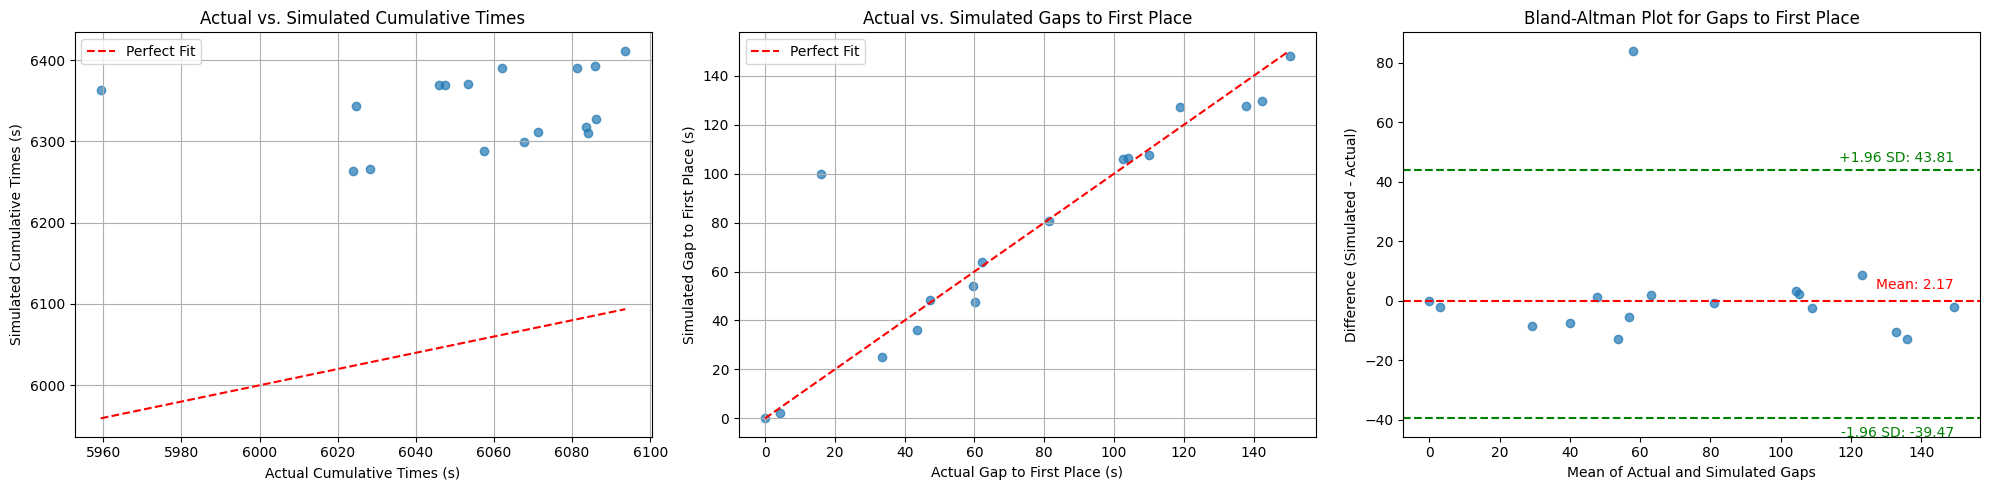

In [4]:
evaluation_mexico.plot_evaluation_results()

In [5]:
evaluation_mexico.calculate_mae()

{'total_absolute_position_error': 6.0,
 'position_mae': 0.35294117647058826,
 'cumulative_time_mae': 284.1953958831492,
 'gap_mae': 9.725704966472062}

In [6]:
evaluation_mexico.calculate_spearman()

{'cumulative_times': {'correlation': 0.34803921568627455,
  'p_value': 0.17101314886910304},
 'gaps_to_leader': {'correlation': 0.9240196078431374,
  'p_value': 1.1844905443995684e-07}}

In [7]:
evaluation_mexico.calculate_wilcoxon()

{'cumulative_times': {'statistic': 0.0,
  'expected_value': 76.5,
  'p_value': 1.52587890625e-05},
 'gaps_to_leader': {'statistic': 47.0,
  'expected_value': 68.0,
  'p_value': 0.27753025059514513}}

## Singapore GP

In [8]:
# Initialise all classes
database_ops_singapore = DatabaseOperations(2024, "Marina Bay")
race_df_singapore = RaceDataframe(database_ops_singapore)
race_data_singapore = RaceDataSetup(database_ops_singapore, race_df_singapore)
overtake_model_singapore = OvertakingModel(race_df_singapore.race_df)
simulation_singapore = RaceSimulator(race_data_singapore, overtake_model_singapore)

In [9]:
simulation_singapore.simulate()
evaluation_singapore = RaceSimEvaluation(simulation_singapore, race_df_singapore, database_ops_singapore)
evaluation_singapore.comparison_df

,driver_name,simulated_position,actual_position,laps_completed,cumulative_time_sim,cumulative_time_actual,gap_to_leader_sim,gap_to_leader_actual,cumulative_time_error,gap_error,position_error
0,Lando Norris,1,1,62,6250.063474,6021.378,0.0,0.0,228.685474,0.0,0
1,Max Verstappen,2,2,62,6276.788113,6041.680,26.724639,20.302,235.108113,6.422639,0
2,Oscar Piastri,3,3,62,6293.795844,6060.709,43.73237,39.331,233.086844,4.40137,0
3,Charles Leclerc,4,5,62,6311.925221,6080.444,61.861747,59.066,231.481221,2.795747,-1
4,George Russell,5,4,62,6314.709868,6080.382,64.646394,59.004,234.327868,5.642394,1
5,Lewis Hamilton,6,6,62,6336.947314,6105.379,86.88384,84.001,231.568314,2.88284,0
6,Carlos Sainz,7,7,62,6338.944975,6112.851,88.8815,91.473,226.093975,-2.5915,0
7,Fernando Alonso,8,8,61,6343.952119,6019.244,93.888644,95.788,324.708119,-1.899356,0
8,Franco Colapinto,9,11,61,6344.511214,6023.832,94.44774,100.376,320.679214,-5.92826,-2
9,Nico Hulkenberg,10,9,61,6351.119497,6022.138,101.056023,98.682,328.981497,2.374023,1


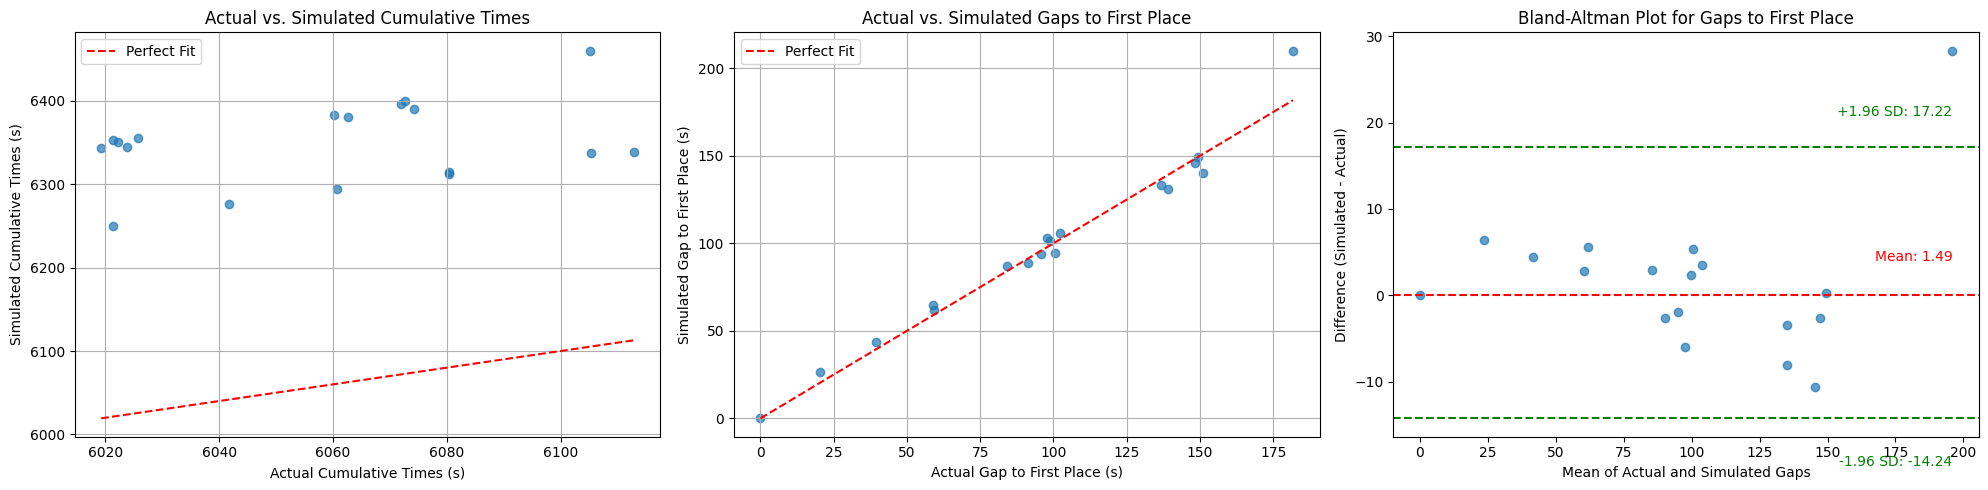

In [10]:
evaluation_singapore.plot_evaluation_results()

In [11]:
evaluation_singapore.calculate_mae()

{'total_absolute_position_error': 12,
 'position_mae': 0.6666666666666666,
 'cumulative_time_mae': 290.0175374295015,
 'gap_mae': 5.4002742317144214}

In [12]:
evaluation_singapore.calculate_spearman()

{'cumulative_times': {'correlation': 0.14344685242518057,
  'p_value': 0.5701354475609233},
 'gaps_to_leader': {'correlation': 0.981424148606811,
  'p_value': 6.725639702470495e-13}}

In [13]:
evaluation_singapore.calculate_wilcoxon()

{'cumulative_times': {'statistic': 0.0,
  'expected_value': 85.5,
  'p_value': 7.62939453125e-06},
 'gaps_to_leader': {'statistic': 63.0,
  'expected_value': 76.5,
  'p_value': 0.5227810104666994}}

## Spanish GP

In [14]:
# Initialise all classes
database_ops_spain = DatabaseOperations(2024, "Barcelona")
race_df_spain = RaceDataframe(database_ops_spain)
race_data_spain = RaceDataSetup(database_ops_spain, race_df_spain)
overtake_model_spain = OvertakingModel(race_df_spain.race_df)
simulation_spain = RaceSimulator(race_data_spain, overtake_model_spain)

In [15]:
simulation_spain.simulate()
evaluation_spain = RaceSimEvaluation(simulation_spain, race_df_spain, database_ops_spain)
evaluation_spain.comparison_df

,driver_name,simulated_position,actual_position,laps_completed,cumulative_time_sim,cumulative_time_actual,gap_to_leader_sim,gap_to_leader_actual,cumulative_time_error,gap_error,position_error
0,Lando Norris,1,2,66,5507.238154,5274.644,0.000000,1.891,232.594154,-1.891000,-1
1,Max Verstappen,2,1,66,5508.112470,5272.753,0.874316,0.000,235.359470,0.874316,1
2,Lewis Hamilton,3,3,66,5515.482692,5289.975,8.244538,17.222,225.507692,-8.977462,0
3,George Russell,4,4,66,5526.490033,5295.604,19.251879,22.851,230.886033,-3.599121,0
4,Carlos Sainz,5,6,66,5532.528361,5302.545,25.290207,29.792,229.983361,-4.501793,-1
5,Charles Leclerc,6,5,66,5533.676203,5294.657,26.438049,21.904,239.019203,4.534049,1
6,Oscar Piastri,7,7,66,5536.572377,5304.789,29.334223,32.036,231.783377,-2.701777,0
7,Pierre Gasly,8,9,66,5551.381007,5333.171,44.142853,60.418,218.210007,-16.275147,-1
8,Sergio Perez,9,8,66,5551.841125,5329.899,44.602971,57.146,221.942125,-12.543029,1
9,Esteban Ocon,10,10,66,5576.192338,5342.652,68.954184,69.899,233.540338,-0.944816,0


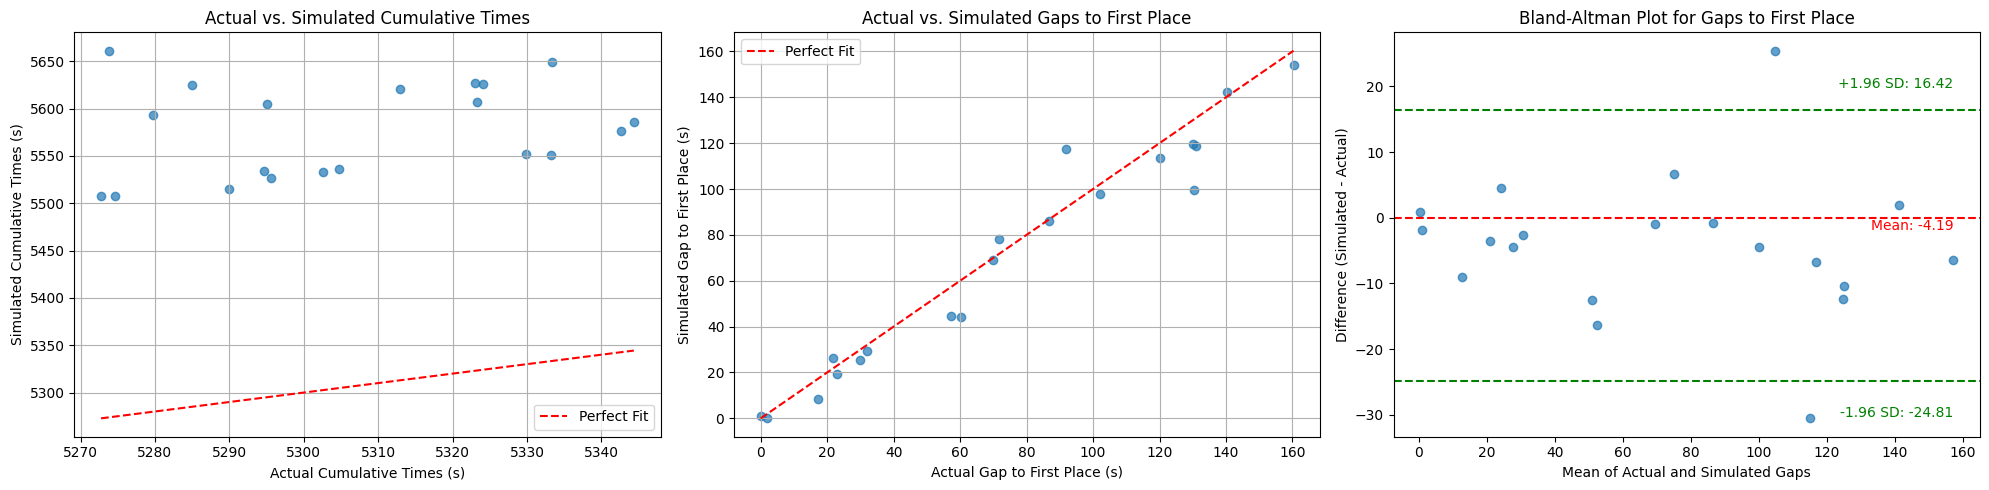

In [16]:
evaluation_spain.plot_evaluation_results()

In [17]:
evaluation_spain.calculate_mae()

{'total_absolute_position_error': 12,
 'position_mae': 0.6,
 'cumulative_time_mae': 270.1645542430161,
 'gap_mae': 8.122553816404842}

In [18]:
evaluation_spain.calculate_spearman()

{'cumulative_times': {'correlation': 0.28872180451127816,
  'p_value': 0.21699266668730374},
 'gaps_to_leader': {'correlation': 0.9744360902255638,
  'p_value': 4.0365222137155066e-13}}

In [19]:
evaluation_spain.calculate_wilcoxon()

{'cumulative_times': {'statistic': 0.0,
  'expected_value': 105.0,
  'p_value': 1.9073486328125e-06},
 'gaps_to_leader': {'statistic': 47.0,
  'expected_value': 105.0,
  'p_value': 0.029575347900390625}}